<h1>Correlation of Cryptos' prices from top 11 by Market Cap<br><u>over 1 year</u></h1>

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<h2>Get List of Top 11 Cryptos by Market Cap from coinmarketcap.com</h2>

In [6]:
from coinMarketCap import getTopHistory
dfs = getTopHistory(limit=11, days=365)

pd.DataFrame(dfs.keys())

,0
0,BTC
1,ETH
2,BNB
3,USDT
4,SOL
5,ADA
6,XRP
7,DOT
8,DOGE
9,USDC


In [7]:
closePrice_df = pd.concat([dfs[key]['close'] for key in dfs],axis=1, keys=list(dfs.keys()))
closePrice_df

,BTC,ETH,BNB,USDT,SOL,ADA,XRP,DOT,DOGE,USDC,SHIB
timestamp,,,,,,,,,,,
2020-11-14,16068.138707,460.149837,27.936201,1.000288,1.917016,0.104202,0.268342,4.465622,0.002773,1.000224,0.000000
2020-11-15,15955.587439,447.559095,27.621030,1.000647,2.043234,0.100531,0.269642,4.379988,0.002775,1.000168,0.000000
2020-11-16,16716.111324,459.940313,28.064110,1.000412,2.255355,0.104008,0.285520,4.485500,0.002886,1.000162,0.000000
2020-11-17,17645.405767,480.360083,28.530581,1.000840,2.202181,0.109600,0.302408,4.844666,0.002936,1.000076,0.000000
2020-11-18,17804.005632,479.484070,28.076163,1.000399,2.115029,0.106403,0.294222,4.679663,0.002909,1.000121,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
2021-11-08,67566.830088,4812.087614,654.315002,1.000443,248.467178,2.124419,1.282377,53.348459,0.282359,0.999828,0.000055
2021-11-09,66971.828097,4735.068755,635.190595,1.000202,239.213138,2.273483,1.258930,50.779363,0.273526,1.000075,0.000055
2021-11-10,64995.229391,4636.174214,615.278062,1.000097,233.779519,2.101802,1.193373,46.871331,0.255709,0.999523,0.000050


<h2>Calculate Pearson and Spearman Correlation by Price for Year (Without moving Avegare)</h2>

Text(0.5, 0.98, 'Correlation over past year')

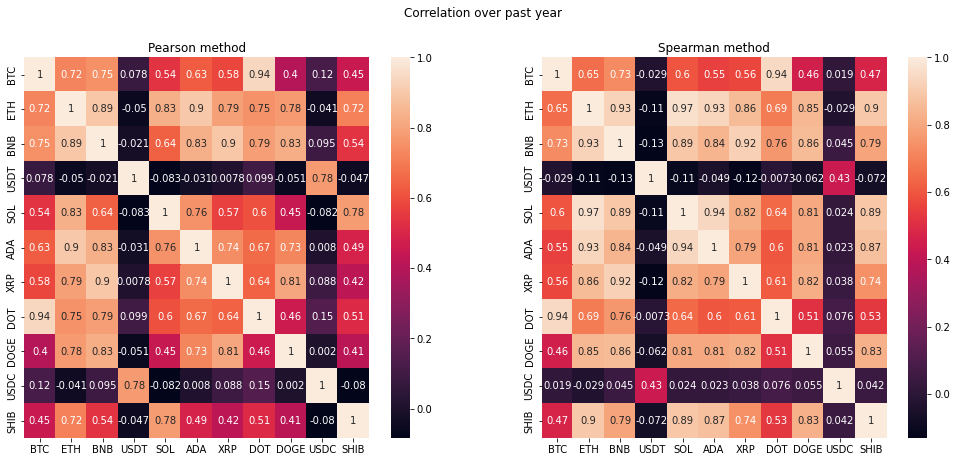

In [8]:
pearson_corr = closePrice_df.corr(method='pearson')
spearman_corr = closePrice_df.corr(method='spearman')

fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, figsize=(17,7))
sns.heatmap(pearson_corr,ax=ax1, annot=True).set(title="Pearson method")
sns.heatmap(spearman_corr,ax=ax2, annot=True).set(title="Spearman method")
fig.suptitle("Correlation over past year")

<h2>Plot correlations for one Year with Moving Average with a Window of 30 days</h2>

In [9]:
year_corr = closePrice_df.rolling(window="30D", center=True).corr()
year_corr

BTC       ETH       BNB      USDT       SOL       ADA  \
timestamp                                                                     
2020-11-14 BTC   1.000000  0.780256  0.779702 -0.468482  0.518076  0.612439   
           ETH   0.780256  1.000000  0.881161 -0.334913  0.283718  0.914562   
           BNB   0.779702  0.881161  1.000000 -0.506352  0.509464  0.752750   
           USDT -0.468482 -0.334913 -0.506352  1.000000 -0.729520 -0.080142   
           SOL   0.518076  0.283718  0.509464 -0.729520  1.000000 -0.030274   
...                   ...       ...       ...       ...       ...       ...   
2021-11-12 XRP   0.781287  0.911301  0.796406  0.095799  0.795224  0.761830   
           DOT   0.161896  0.495636  0.471437  0.554338  0.784235  0.203593   
           DOGE  0.078497 -0.222032 -0.406215 -0.345688 -0.435342  0.011730   
           USDC -0.325196 -0.093158  0.133432  0.846513  0.400687 -0.142554   
           SHIB -0.488731 -0.695689 -0.649210 -0.097599 -0.760371 -0.527578   

                      XRP       DOT      DOGE      USDC      SHIB  
timestamp                                                          
2020-11-14 BTC   0.564488  0.863373  0.732468 -0.570278       NaN  
           ETH   0.891998  0.897715  0.931279 -0.487748       NaN  
           BNB   0.756066  0.845532  0.946673 -0.591044       NaN  
           USDT -0.005043 -0.594828 -0.321961  0.535155       NaN  
           SOL  -0.002807  0.562152  0.339887 -0.619111       NaN  
...                   ...       ...       ...       ...       ...  
2021-11-12 XRP   1.000000  0.588249 -0.209453  0.077296 -0.803650  
           DOT   0.588249  1.000000 -0.174857  0.538349 -0.402996  
           DOGE -0.209453 -0.174857  1.000000 -0.094253  0.613751  
           USDC  0.077296  0.538349 -0.094253  1.000000  0.000841  
           SHIB -0.803650 -0.402996  0.613751  0.000841  1.000000  

[4004 rows x 11 columns]

Text(0.5, 1.0, 'BTC/SOL correlation over year')

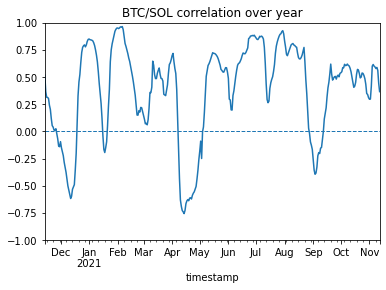

In [10]:
year_corr.unstack()['BTC','SOL'].plot()
ax = plt.gca()
ax.set_ylim((-1,1))
ax.axhline(y=0, ls='--', lw=1)
ax.set_title('BTC/SOL correlation over year')

<h2>Plot all Pairs</h2>

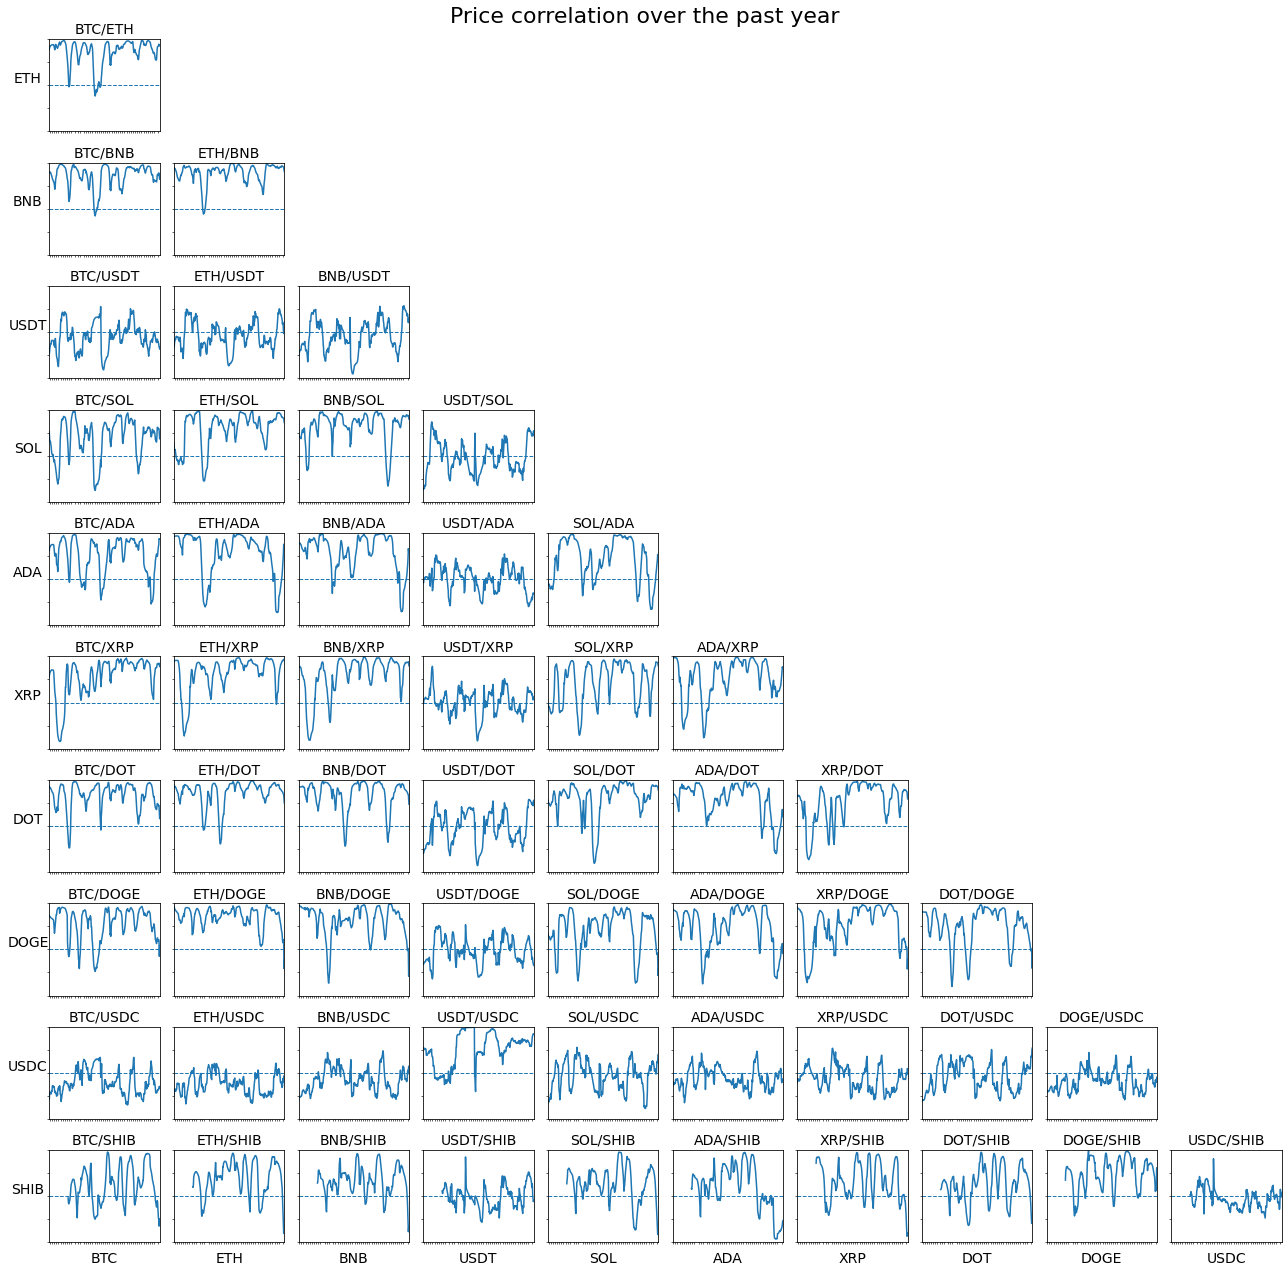

In [11]:
fig, axes = plt.subplots(10, 10, sharex=True, sharey=True, figsize=(18,18))
fig.patch.set_facecolor('xkcd:white')
for i, key1 in enumerate(year_corr):
    if i==0 : continue
    for j, key2 in enumerate(year_corr):
        if j == len(year_corr.columns)-1 : continue
        
        ax = axes[i-1][j]
        
        if j < i: 
            year_corr.unstack()[key1,key2].plot(ax=ax)
            ax.axhline(y=0, ls='--', lw=1)
            # if i == j+1 : 
            ax.set_title(key2+'/'+key1, fontsize=14)
        else:
            ax.axis('off')
            # ax.set_title(key1, fontsize=14)
            
        ax.set_ylim((-1,1))
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        
        if j == 0 : ax.set_ylabel(key1, rotation=0, fontsize=14, labelpad=16)
        if i == len(year_corr.columns)-1 : ax.set_xlabel(key2,fontsize=14)

fig.suptitle('Price correlation over the past year', fontsize=22)
fig.tight_layout()